## Here, various factors which relates to overall customer satisfaction have been analysed and prediction is made on the test dataset using Random Forest Classifier.

In [1]:
## Importing the relevant libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
## training data is loaded into the train dataframe.

train = pd.read_csv("train.csv")

In [3]:
train.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
## dropping the unnamed column as it is just an index for the entries.
train.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
## Calculating the percentage of missing values.

round(((train.isnull().sum())/len(train.index))*100,3)

id                                   0.000
Gender                               0.000
Customer Type                        0.000
Age                                  0.000
Type of Travel                       0.000
Class                                0.000
Flight Distance                      0.000
Inflight wifi service                0.000
Departure/Arrival time convenient    0.000
Ease of Online booking               0.000
Gate location                        0.000
Food and drink                       0.000
Online boarding                      0.000
Seat comfort                         0.000
Inflight entertainment               0.000
On-board service                     0.000
Leg room service                     0.000
Baggage handling                     0.000
Checkin service                      0.000
Inflight service                     0.000
Cleanliness                          0.000
Departure Delay in Minutes           0.000
Arrival Delay in Minutes             0.298
satisfactio

In [8]:
## As the number of missing values is less as compared to total values, dropping the missing values.
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

In [9]:
## Looking at the percentages of missing values again.
round(((train.isnull().sum())/len(train.index))*100,3)

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

## Exploratory Data Analysis.

<Figure size 576x432 with 0 Axes>

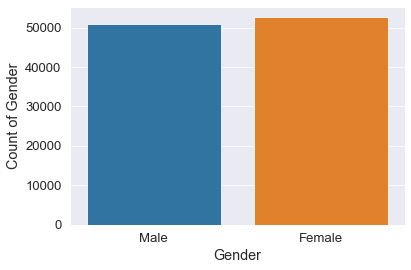

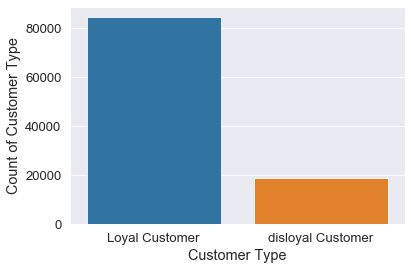

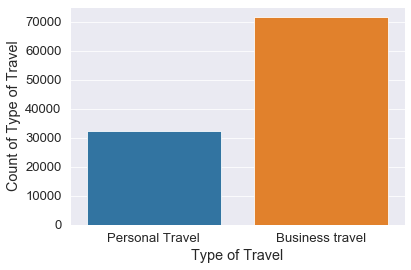

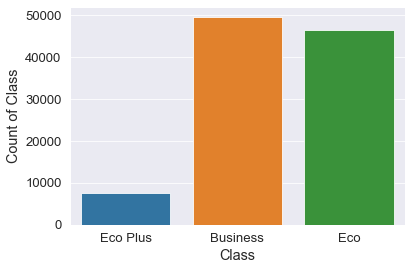

In [21]:
## First look at the count of values for each of the categorical variables.

categorical = ["Gender","Customer Type","Type of Travel","Class"]
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

for item in  categorical:
    plt.subplots(1,1)
    sns.countplot(train[item])
    plt.xlabel(item)
    plt.ylabel("Count of {0}".format(item))
   

- There is no significant difference in the customers as per Gender.
- Business Travel are more in comparison to personal travel.
- Customer travelling in business class and economy class are  fairly equal.
- Loyal Customers are significantly higher than disloyal customers

<Figure size 576x432 with 0 Axes>

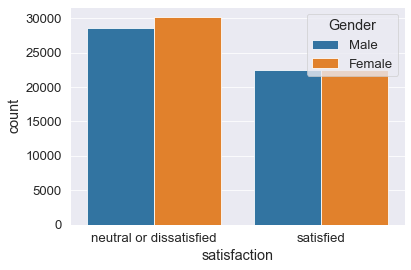

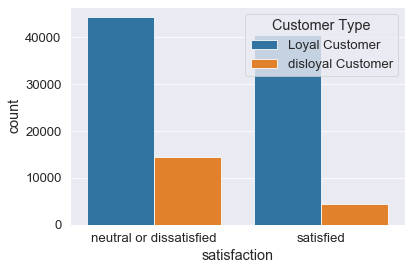

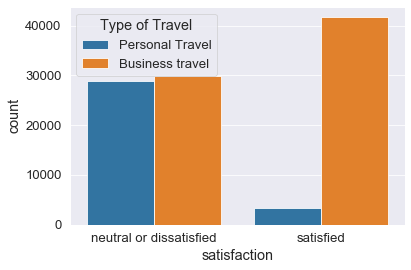

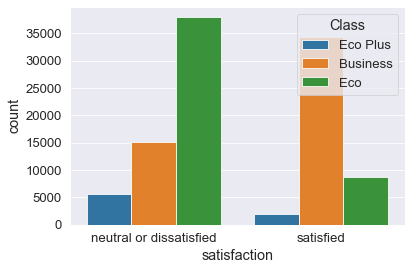

In [22]:
## Now we look at the count for these variables in terms of the target variable i.e. satisfaction.

sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

for item in categorical:
    plt.subplots(1,1)
    sns.countplot(train["satisfaction"], hue = train[item])

- We find that business travellers tend to more satisfied.
- Business class travellers are at significantly higher level of satisfaction while the economy passengers tend to be highly dissatisfied.

<Figure size 576x432 with 0 Axes>

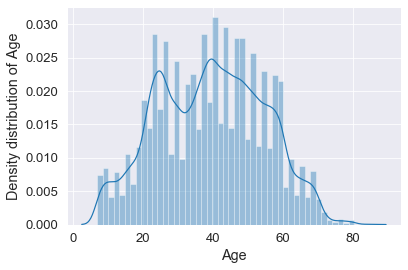

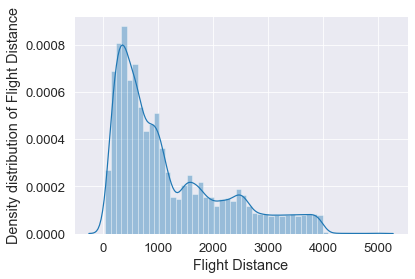

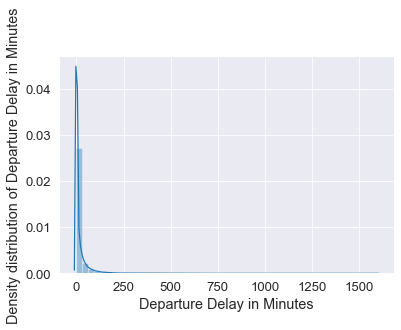

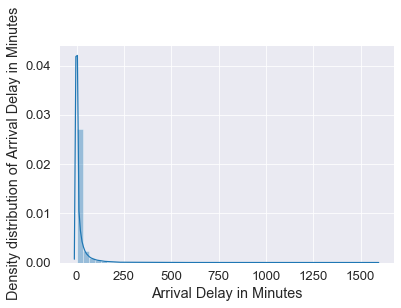

In [24]:
## We now look at the distribution of the numerical features in the dataset.

numerical = ["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]

sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

for item in numerical:
    plt.subplots(1,1)
    sns.distplot(train[item])
    plt.ylabel("Density distribution of {0}".format(item))


<Figure size 576x432 with 0 Axes>

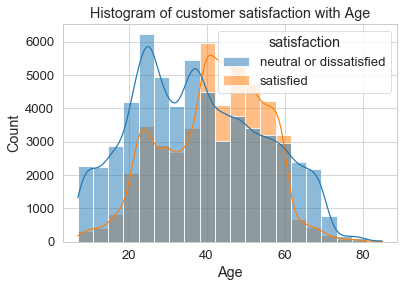

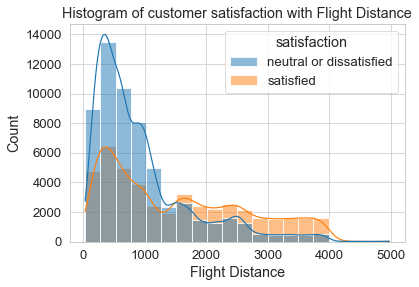

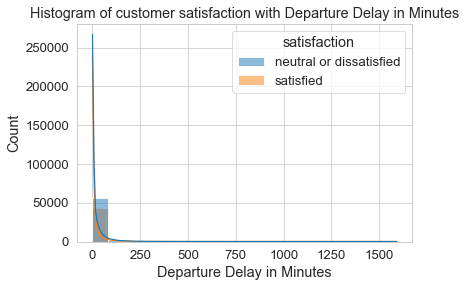

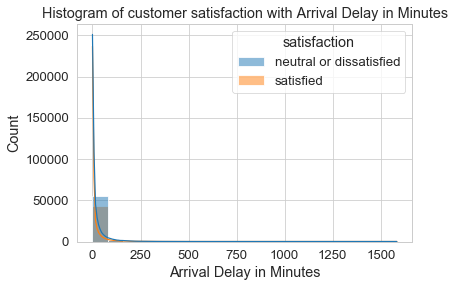

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)
plt.show()



for item in numerical:
    plt.subplots(1,1)
    sns.histplot(x= item , data = train, bins = 20,hue = train["satisfaction"], kde = True)
    plt.title("Histogram of customer satisfaction with {}".format(item))
    

- Customers below the age of 40 have more neutral or dissatisfactory experience.
- Customers travelling on flight with a distance of upto 1000 miles tends to have more neutral or dissatisfactory experience.

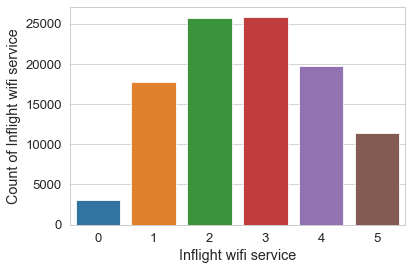

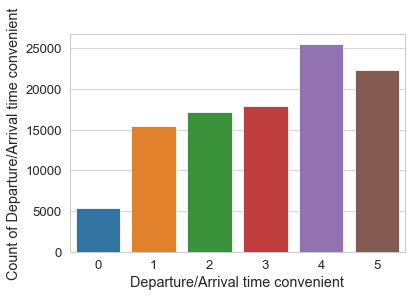

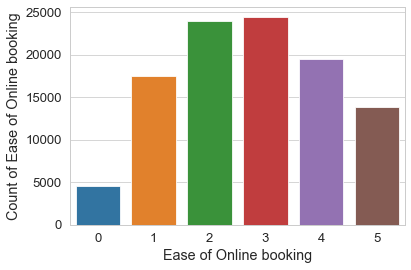

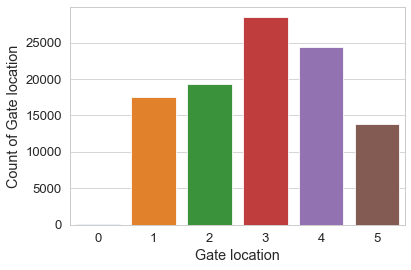

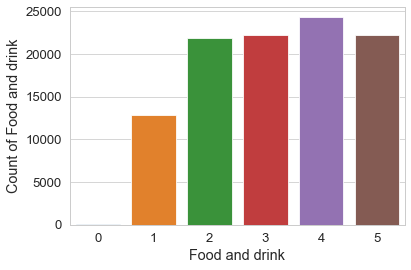

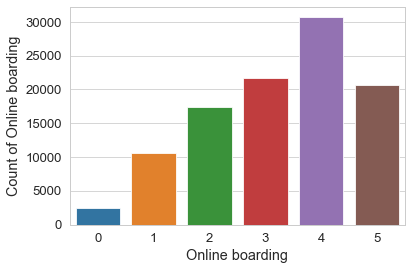

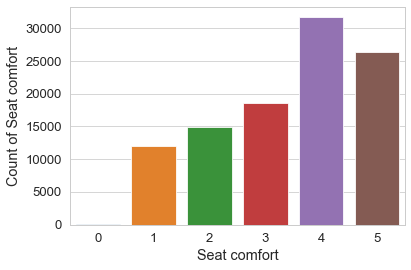

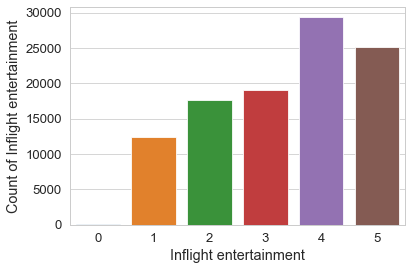

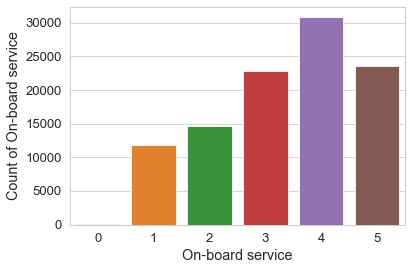

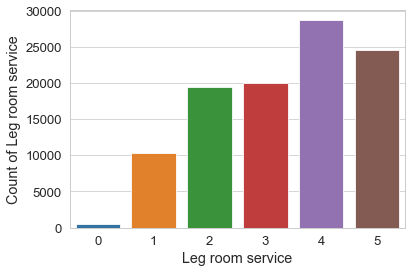

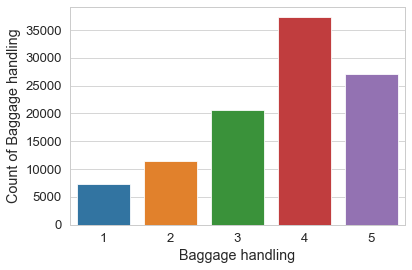

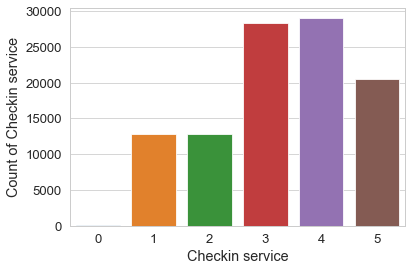

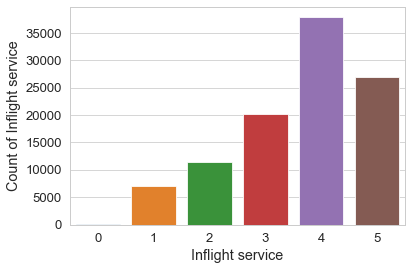

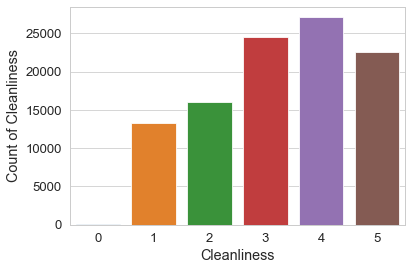

In [26]:
## Now we look at the distribution of satisfactory rating for various services rated by the customers.

services = ["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding",
          "Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service",
          "Cleanliness"]

for item in services:
    plt.subplots(1,1)
    sns.countplot(train[item])
    plt.xlabel(item)
    plt.ylabel("Count of {0}".format(item))

- We observe that for a majority of services highest customer rating is 4. But this does not translate into higher levels of overall customer satisfaction.

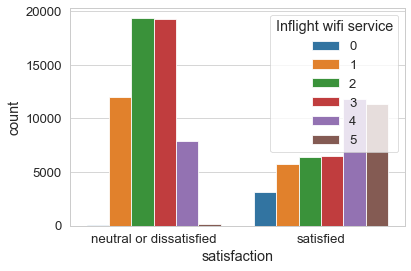

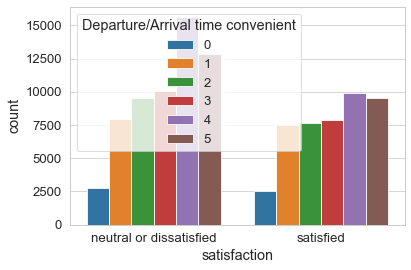

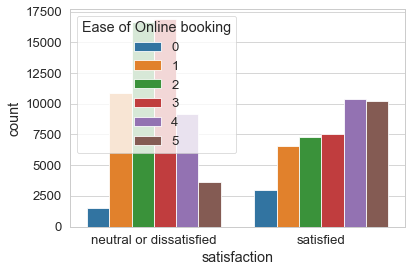

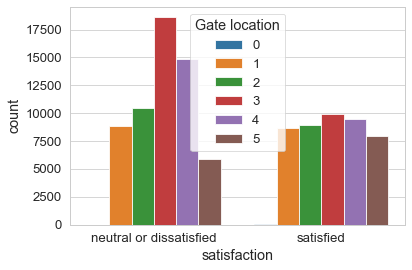

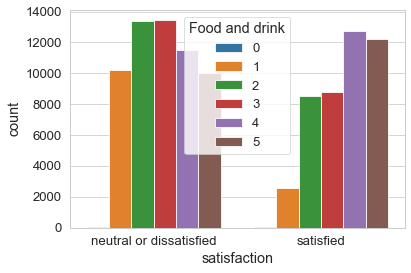

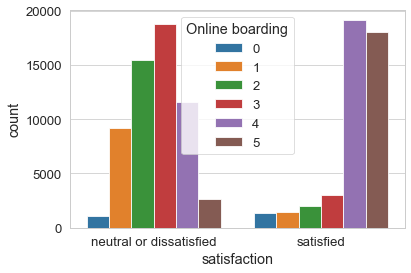

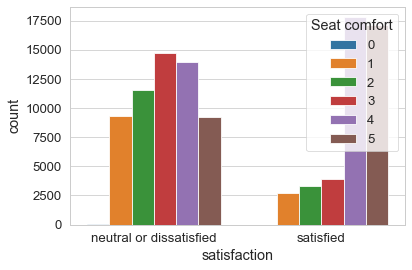

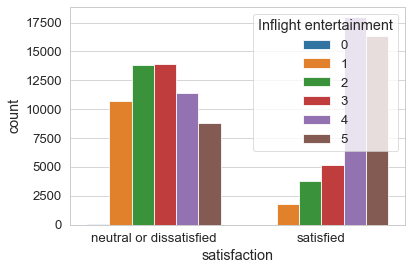

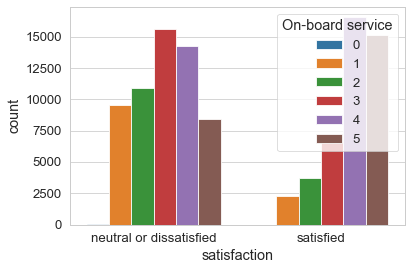

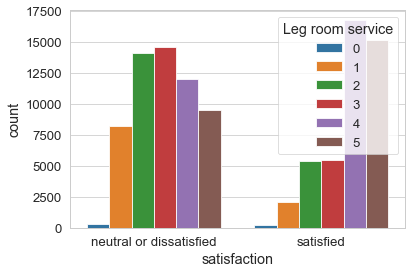

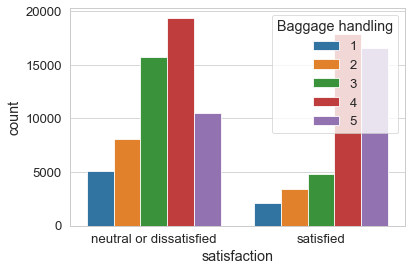

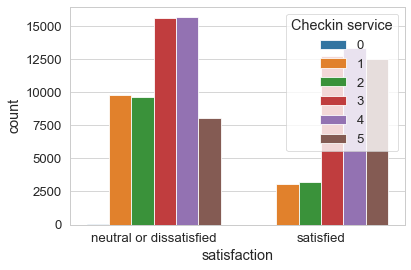

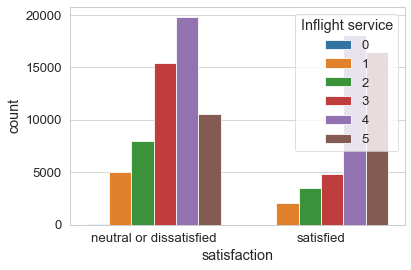

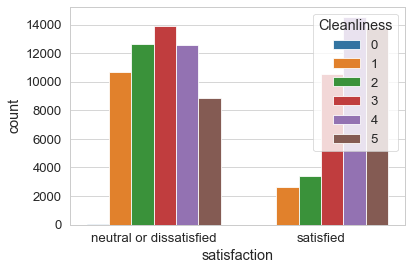

In [27]:
## Observing the  distribution of satisfaction scores with overall customer satisfaction.

for item in services:
    plt.subplots(1,1)
    sns.countplot(train["satisfaction"], hue = train[item])

### We further do the analysis based on class of travel and total travel distance as these two classes show significant differences in the customer satisfaction levels.

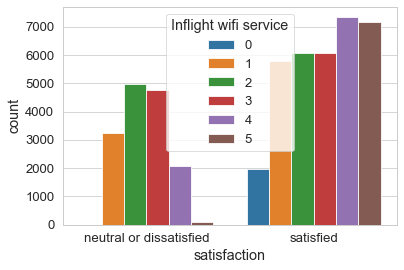

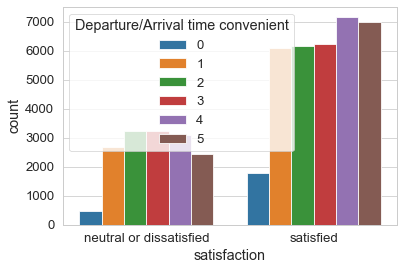

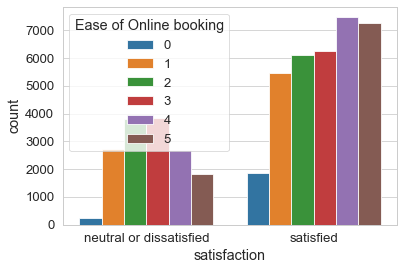

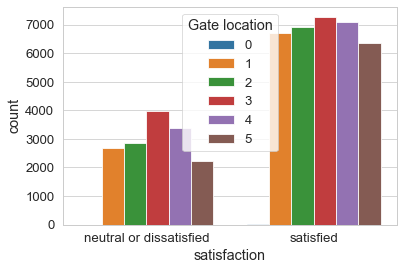

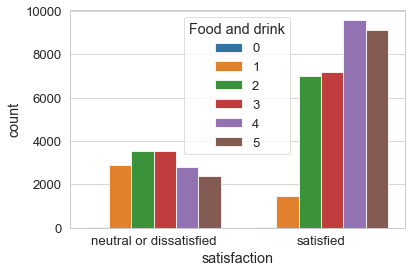

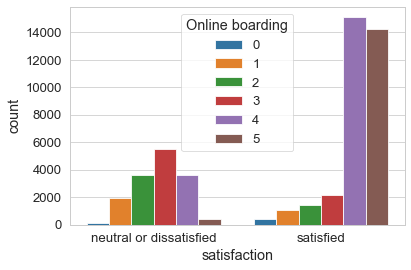

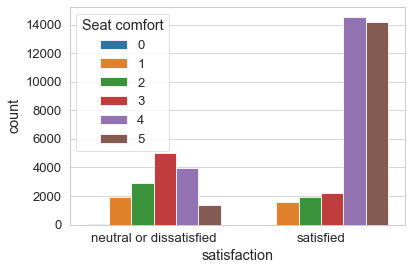

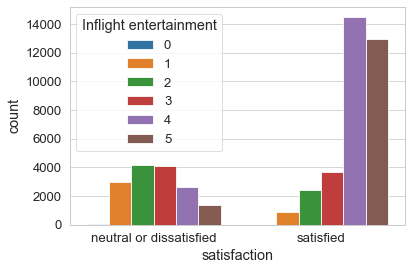

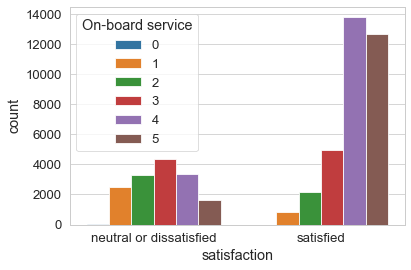

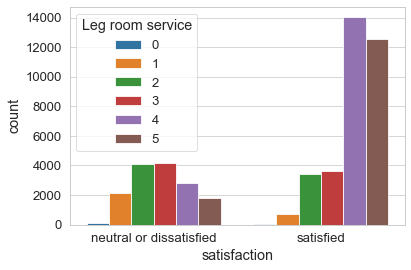

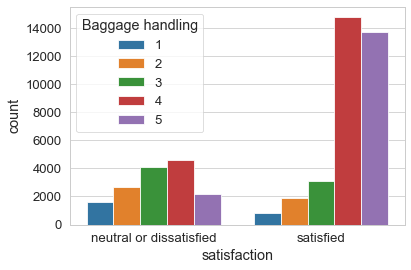

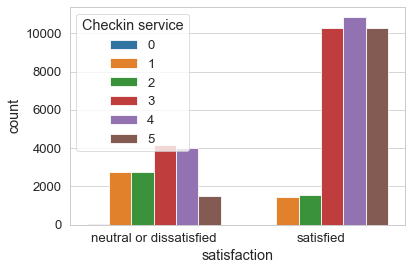

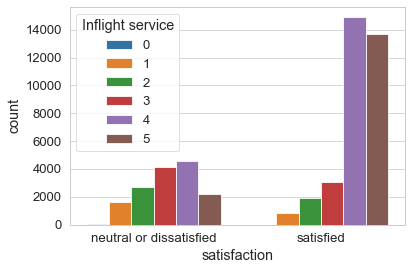

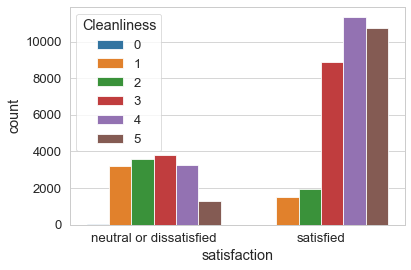

In [28]:
## Now we look at the response for each of the classes for these services.
## Business Class.

for item in services:
    plt.subplots(1,1)
    sns.countplot(x= "satisfaction", hue = item, data = train[train["Class"] == "Business"])

- Some of the factors, high score on which are a clear indication of customer satisfaction for business class  are:

 1. Online Boarding
 2. Seat Comfort
 3. Inflight Entertainment
 4. Onboard Service
 5. Legroom service
 6. Baggage handling
 7. Checkin Service
 8. Cleanliness
 9. Inflight Service

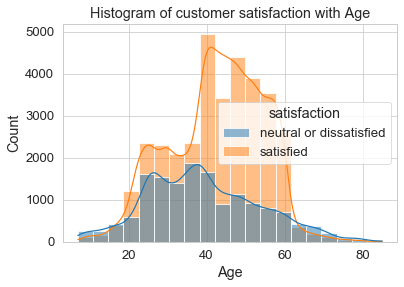

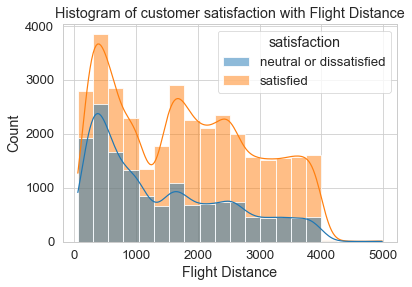

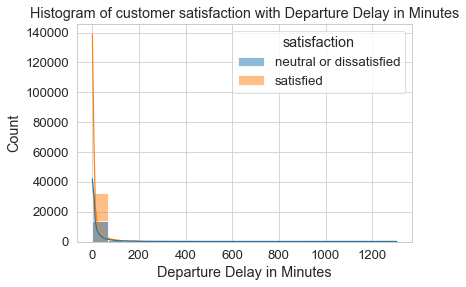

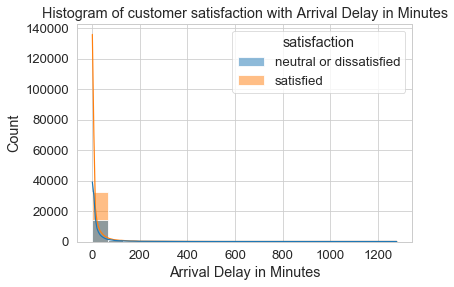

In [29]:

for item in numerical:
    plt.subplots(1,1)
    sns.histplot(x= item , data = train[train["Class"] == "Business"], bins = 20,hue = train["satisfaction"], kde = True)
    plt.title("Histogram of customer satisfaction with {}".format(item))

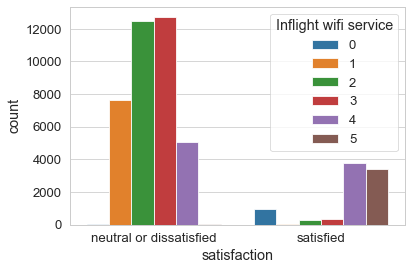

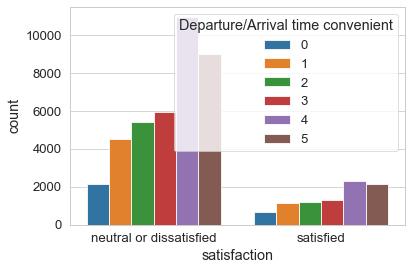

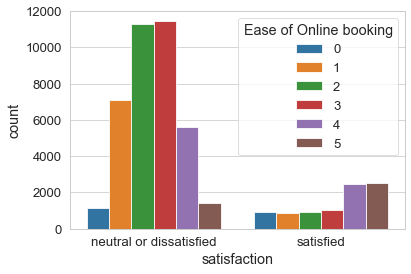

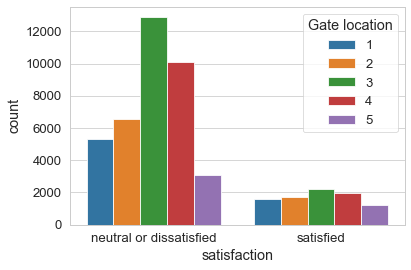

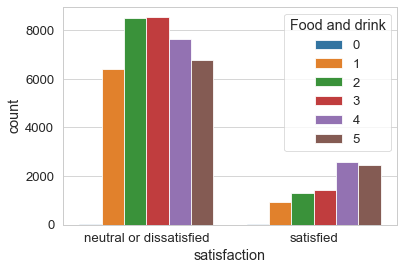

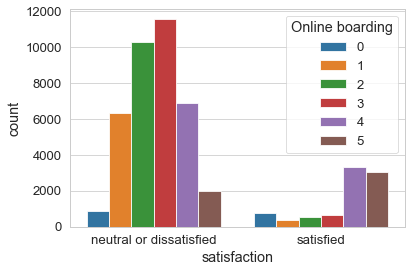

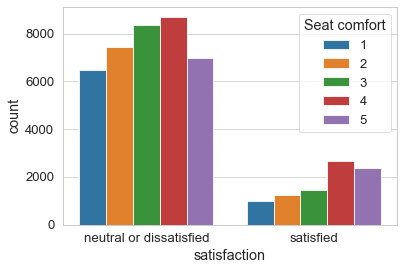

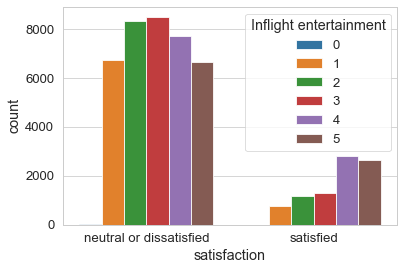

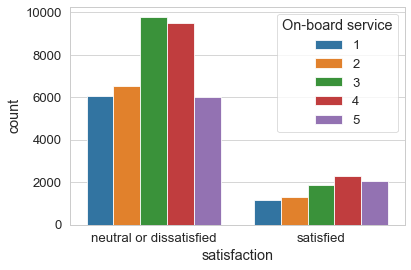

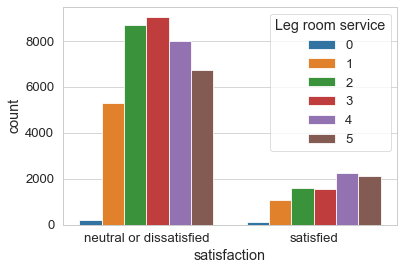

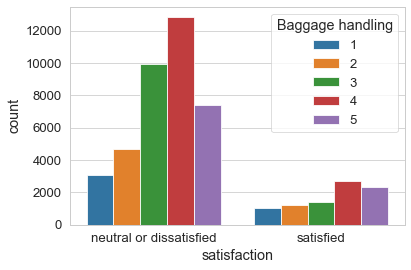

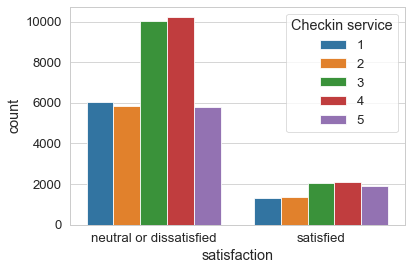

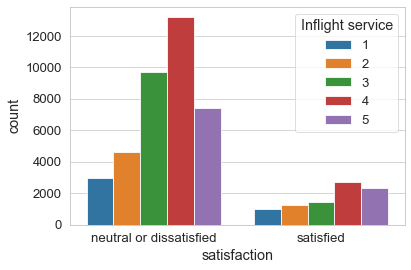

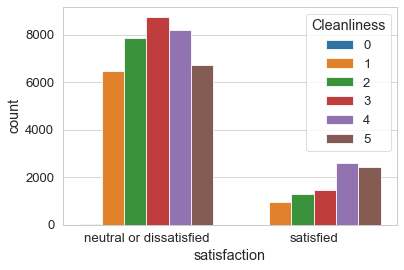

In [30]:
## Economy Class.
for item in services:
    plt.subplots(1,1)
    sns.countplot(x= "satisfaction", hue = item, data = train[train["Class"] == "Eco"])

- Customers travelling economy class who are either neutral or dissatified have given ratings of 2,3 for most of the parameters.

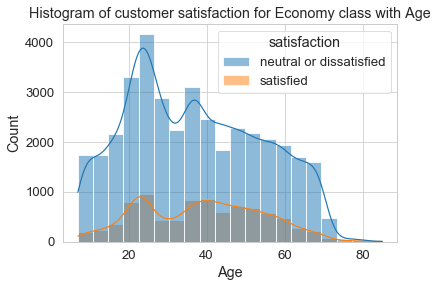

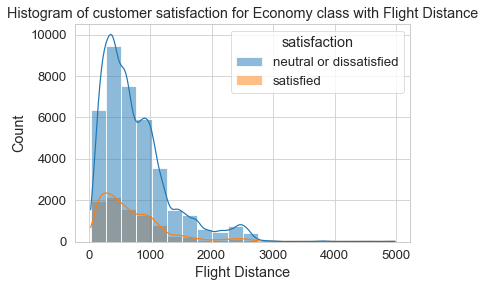

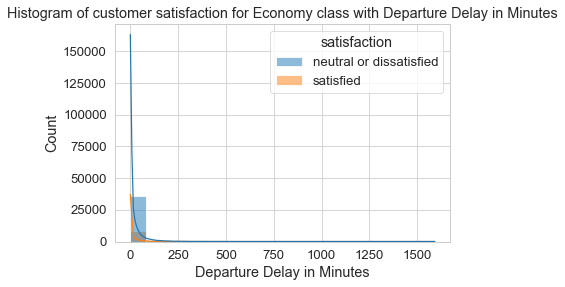

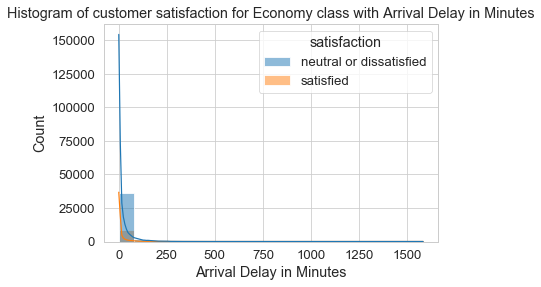

In [31]:

for item in numerical:
    plt.subplots(1,1)
    sns.histplot(x= item , data = train[train["Class"] == "Eco"], bins = 20,hue = train["satisfaction"], kde = True)
    plt.title("Histogram of customer satisfaction for Economy class with {}".format(item))

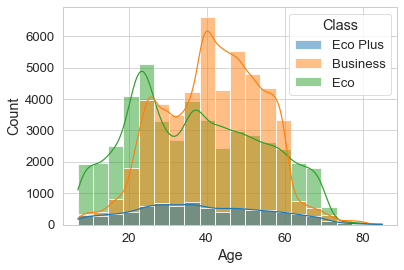

In [33]:
sns.histplot(x= "Age" , data = train, bins = 20,hue = train["Class"], kde = True)

- We find that majority of economy travellers are less than 40 years of age and majority of business travellers are above 40 years of age.

-  This is inline with higher level of satisfaction among customers who are more than 40 years of age than those less than 40 years of age.

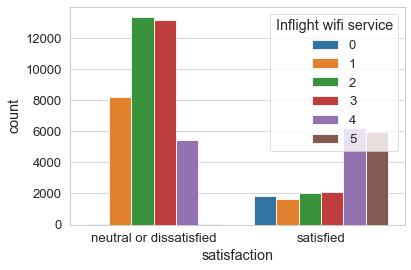

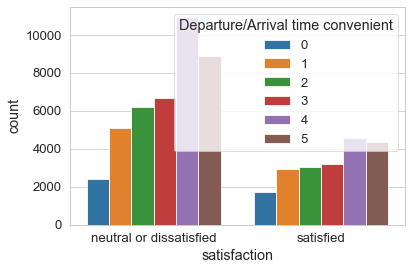

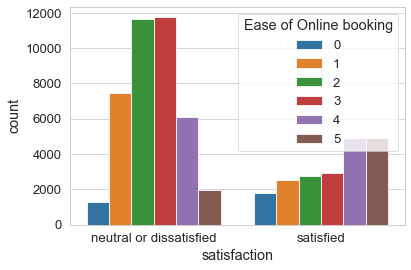

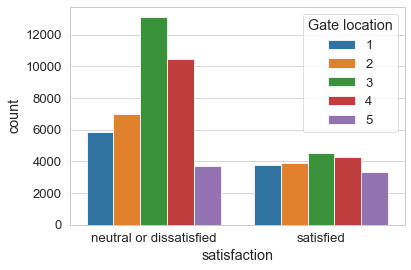

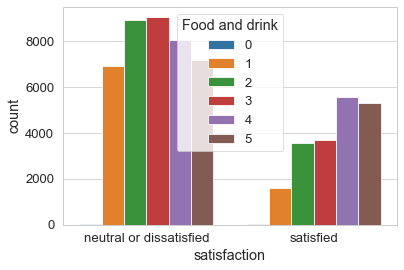

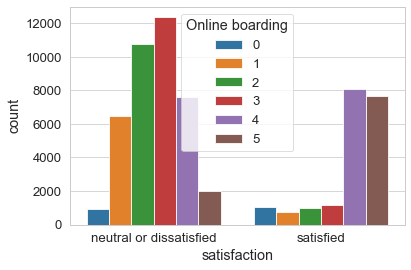

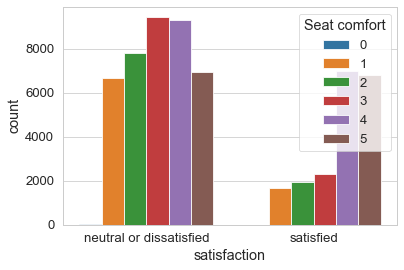

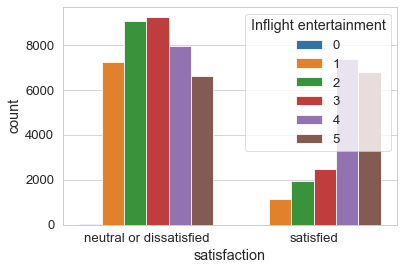

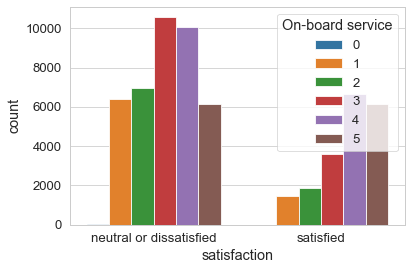

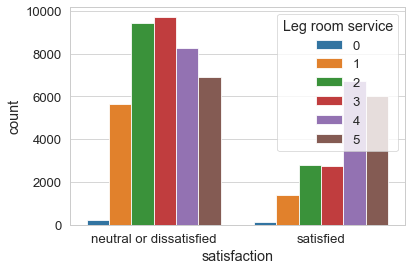

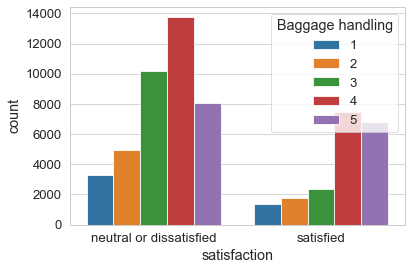

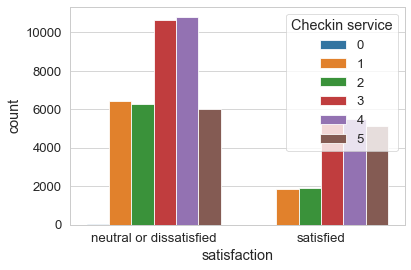

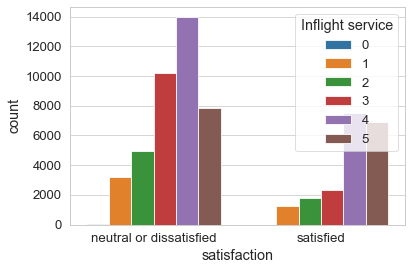

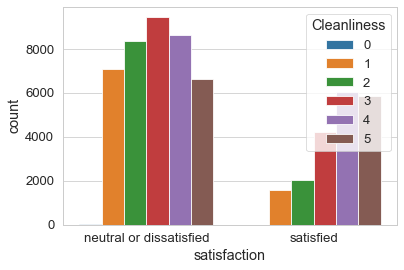

In [34]:
## We now look the services rating for flights which are less than 1000 miles long.

for item in services:
    plt.subplots(1,1)
    sns.countplot(x= "satisfaction", hue = item, data = train[train["Flight Distance"] <=1000])

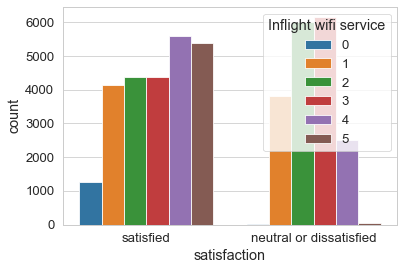

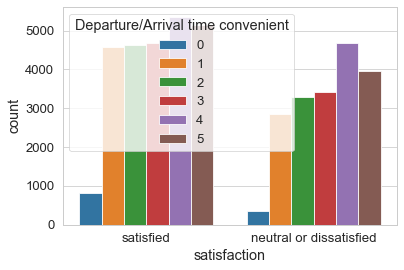

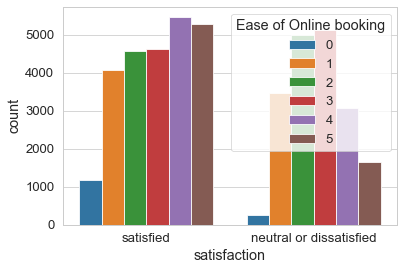

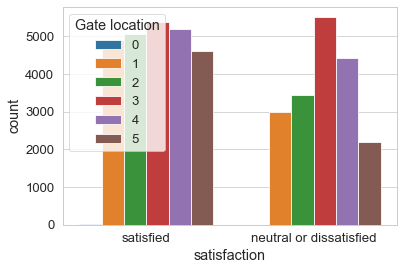

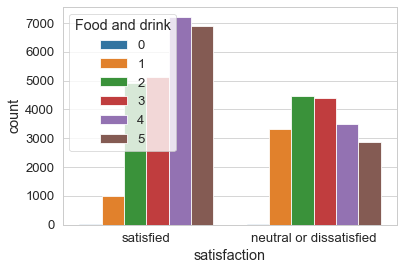

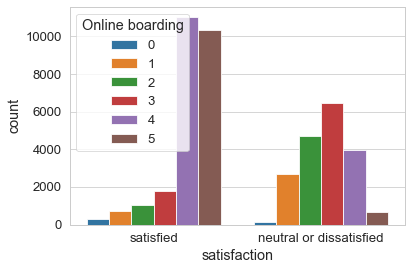

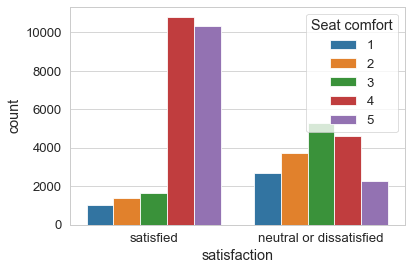

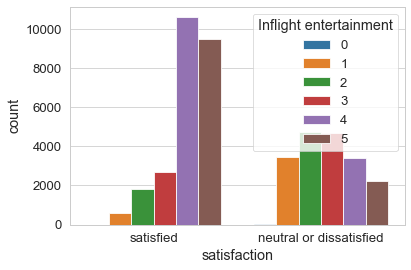

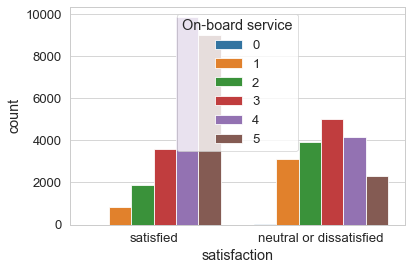

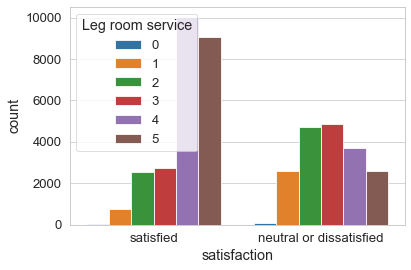

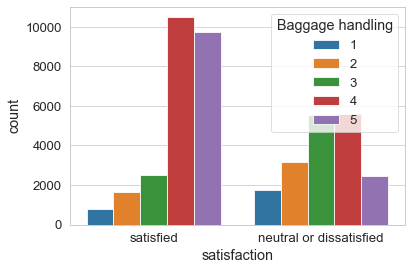

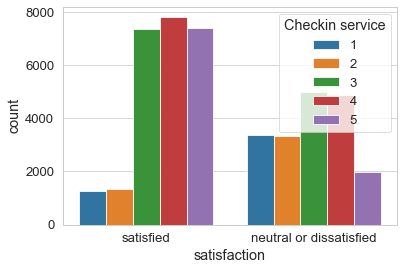

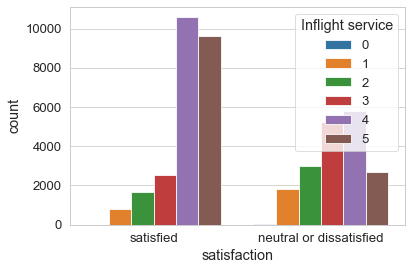

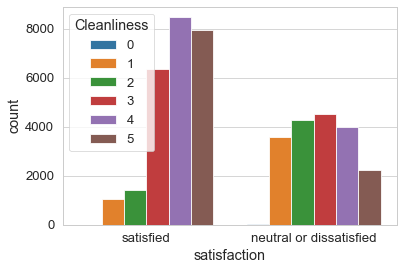

In [35]:
## We now look the services rating for flights which are more than 1000 miles long.

for item in services:
    plt.subplots(1,1)
    sns.countplot(x= "satisfaction", hue = item, data = train[train["Flight Distance"] > 1000])

## Prediction.

### We use Random forest to make our predictions.

In [36]:
train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [37]:
## First converting satisfaction variable to 1 and 0.

train["satisfaction"] = train["satisfaction"].map({"neutral or dissatisfied":0, 'satisfied':1})

In [38]:
train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [39]:
dummy_set = ["Gender","Customer Type","Type of Travel","Class"]

In [40]:
## COnverting categorical variables to dummy variables.

for item in dummy_set:
    status = pd.get_dummies(train[item], prefix = item, drop_first = True)
    train = pd.concat([train,status],axis=1)

In [41]:
train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight service  Cleanliness  \
0                       3  ...                 5            5   
1                       3  ...                 4            1   
2                       2  ...                 4            5   
3                       5  ...                 4            2   
4                       3  ...                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                      18.0             0   
1                           1                       6.0             0   
2                           0                       0.0             1   
3                          11                       9.0             0   
4                           0                       0.0             1   

   Gender_Male  Customer Type_disloyal Customer  \
0            1                                0   
1            1                                1   
2            0                                0   
3            0                                0   
4            1                                0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
0                               1          0               1  
1                               0          0               0  
2                               0          0               0  
3                               0          0               0  
4                               0          0               0  

[5 rows x 29 columns]

In [42]:
## dropping the categorical variables now.

train.drop(dummy_set, axis=1 , inplace=True)

In [43]:
train.head()

id  Age  Flight Distance  Inflight wifi service  \
0   70172   13              460                      3   
1    5047   25              235                      3   
2  110028   26             1142                      2   
3   24026   25              562                      2   
4  119299   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  ...  Inflight service  \
0               5                3             5  ...                 5   
1               1                3             1  ...                 4   
2               5                5             5  ...                 4   
3               2                2             2  ...                 4   
4               4                5             5  ...                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  Gender_Male  Customer Type_disloyal Customer  \
0             0            1                                0   
1             0            1                                1   
2             1            0                                0   
3             0            0                                0   
4             1            1                                0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
0                               1          0               1  
1                               0          0               0  
2                               0          0               0  
3                               0          0               0  
4                               0          0               0  

[5 rows x 25 columns]

In [44]:
## Dropping the id column.

train.drop("id", axis=1, inplace=True)

In [45]:
train.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               5                3             5                       5  ...   
1               1                3             1                       1  ...   
2               5                5             5                       5  ...   
3               2                2             2                       2  ...   
4               4                5             5                       3  ...   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                      18.0             0            1   
1                       6.0             0            1   
2                       0.0             1            0   
3                       9.0             0            0   
4                       0.0             1            1   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                                0                               1          0   
1                                1                               0          0   
2                                0                               0          0   
3                                0                               0          0   
4                                0                               0          0   

   Class_Eco Plus  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 24 columns]

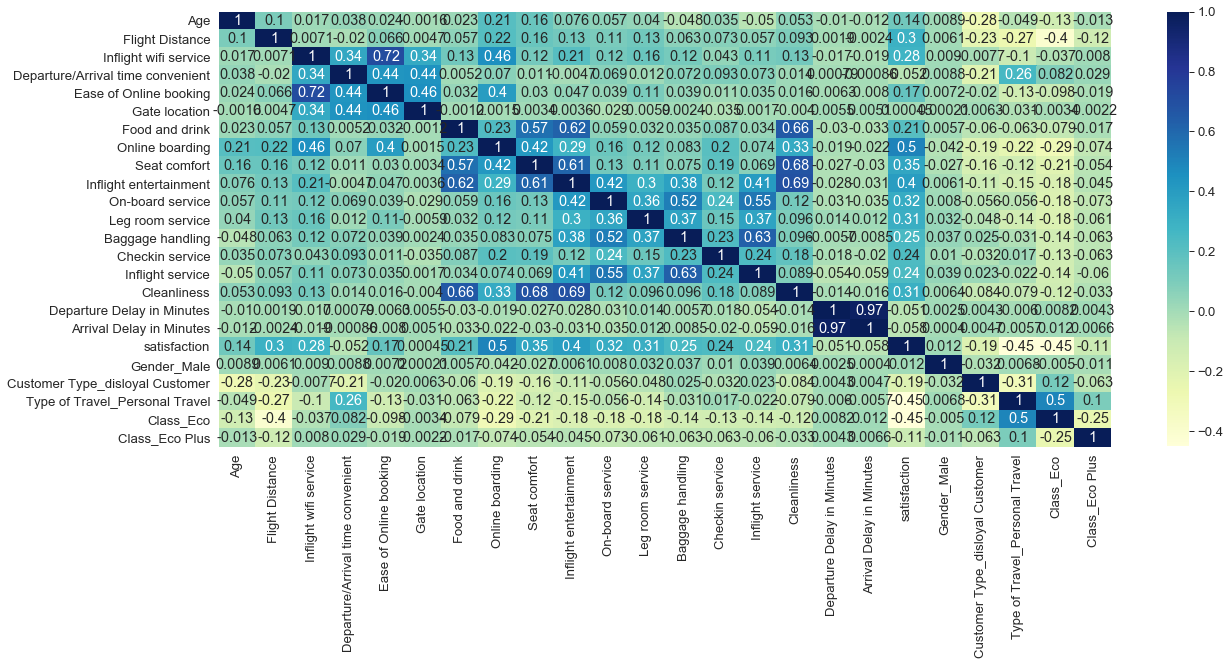

In [46]:
plt.figure(figsize=[20,8])

sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

In [47]:
train.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               5                3             5                       5  ...   
1               1                3             1                       1  ...   
2               5                5             5                       5  ...   
3               2                2             2                       2  ...   
4               4                5             5                       3  ...   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                      18.0             0            1   
1                       6.0             0            1   
2                       0.0             1            0   
3                       9.0             0            0   
4                       0.0             1            1   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                                0                               1          0   
1                                1                               0          0   
2                                0                               0          0   
3                                0                               0          0   
4                                0                               0          0   

   Class_Eco Plus  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 24 columns]

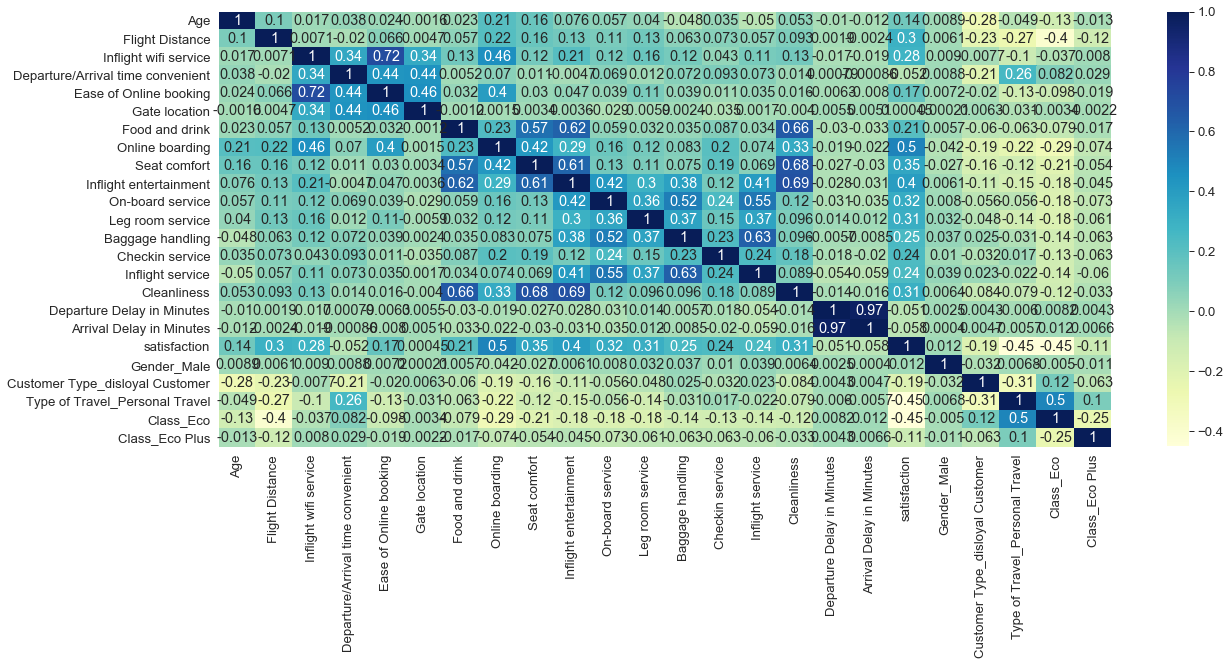

In [48]:
plt.figure(figsize=[20,8])

sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

In [49]:
## Importing the test dataset.

test = pd.read_csv("test.csv")
test.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [50]:
## Dropping unnamed and id columns.

test.drop(["Unnamed: 0","id"], axis=1, inplace = True)

In [51]:
test.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                       5   
1                       3              1  ...                       4   
2                       2              4  ...                       2   
3                       0              2  ...                       1   
4                       4              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 23 columns]

In [52]:
test["satisfaction"] = test["satisfaction"].map({"neutral or dissatisfied":0, 'satisfied':1})

In [53]:
test.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                       5   
1                       3              1  ...                       4   
2                       2              4  ...                       2   
3                       0              2  ...                       1   
4                       4              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes  satisfaction  
0                      44.0             1  
1                       0.0             1  
2                       0.0             0  
3                       6.0             1  
4                      20.0             1  

[5 rows x 23 columns]

In [54]:
## Applying dummy variables transformation.

for item in dummy_set:
    status = pd.get_dummies(test[item], prefix = item, drop_first = True)
    test = pd.concat([test,status],axis=1)

In [55]:
test.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight service  Cleanliness  \
0                       3              4  ...                 5            5   
1                       3              1  ...                 4            5   
2                       2              4  ...                 2            2   
3                       0              2  ...                 1            4   
4                       4              3  ...                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          50                      44.0             1   
1                           0                       0.0             1   
2                           0                       0.0             0   
3                           0                       6.0             1   
4                           0                      20.0             1   

   Gender_Male  Customer Type_disloyal Customer  \
0            0                                0   
1            0                                0   
2            1                                1   
3            1                                0   
4            0                                0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
0                               0          1               0  
1                               0          0               0  
2                               0          1               0  
3                               0          0               0  
4                               0          1               0  

[5 rows x 28 columns]

In [56]:
test.drop(dummy_set, axis=1 , inplace=True)

In [57]:
test.head()

Age  Flight Distance  Inflight wifi service  \
0   52              160                      5   
1   36             2863                      1   
2   20              192                      2   
3   44             3377                      0   
4   49             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               3                4             3                       5  ...   
1               5                4             5                       4  ...   
2               2                2             2                       2  ...   
3               3                4             4                       1  ...   
4               4                1             2                       2  ...   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes  satisfaction  Gender_Male  \
0                      44.0             1            0   
1                       0.0             1            0   
2                       0.0             0            1   
3                       6.0             1            1   
4                      20.0             1            0   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                                0                               0          1   
1                                0                               0          0   
2                                1                               0          1   
3                                0                               0          0   
4                                0                               0          1   

   Class_Eco Plus  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 24 columns]

In [58]:
## Calculating the percentage of missing values.

round(((test.isnull().sum())/len(test.index))*100,3)

Age                                  0.00
Flight Distance                      0.00
Inflight wifi service                0.00
Departure/Arrival time convenient    0.00
Ease of Online booking               0.00
Gate location                        0.00
Food and drink                       0.00
Online boarding                      0.00
Seat comfort                         0.00
Inflight entertainment               0.00
On-board service                     0.00
Leg room service                     0.00
Baggage handling                     0.00
Checkin service                      0.00
Inflight service                     0.00
Cleanliness                          0.00
Departure Delay in Minutes           0.00
Arrival Delay in Minutes             0.32
satisfaction                         0.00
Gender_Male                          0.00
Customer Type_disloyal Customer      0.00
Type of Travel_Personal Travel       0.00
Class_Eco                            0.00
Class_Eco Plus                    

In [59]:
test.dropna(inplace=True)

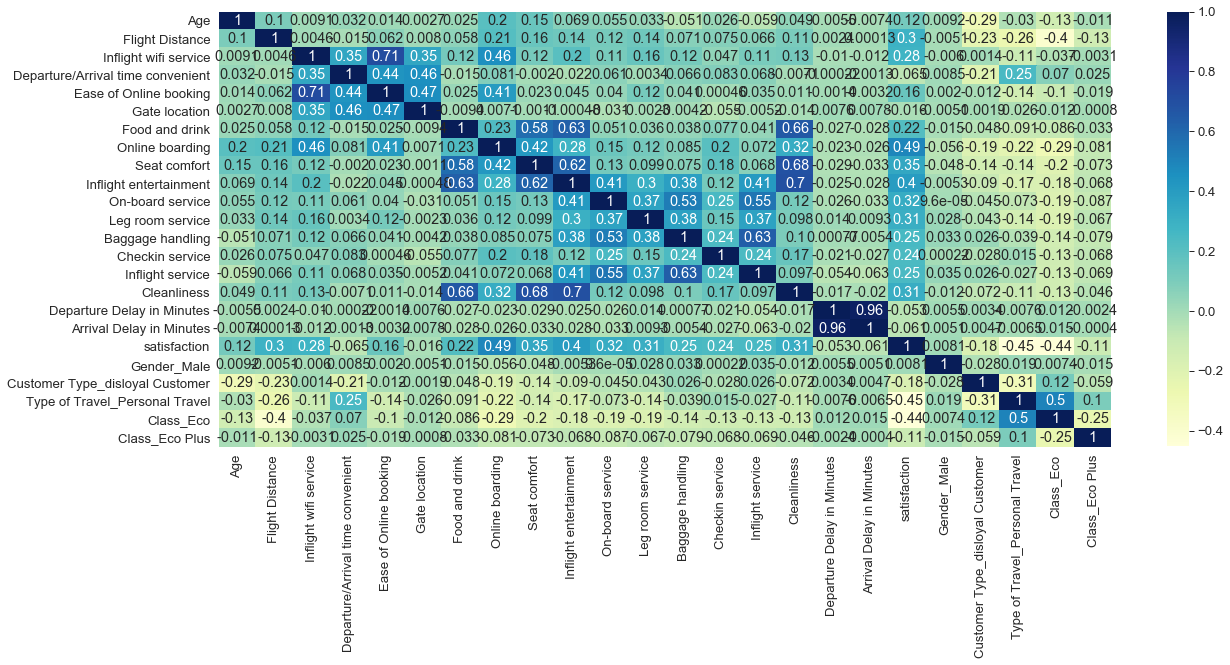

In [60]:
plt.figure(figsize=[20,8])

sns.heatmap(test.corr(), annot = True, cmap= "YlGnBu")

In [61]:
## Defining X_train, y_train, X_test and y_test.

X_train = train.drop("satisfaction", axis=1)
y_train = train["satisfaction"]


X_test = test.drop("satisfaction", axis=1)
y_test = test["satisfaction"]

In [62]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [63]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
# Making predictions
predictions = rfc.predict(X_test)

In [65]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [66]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

   micro avg       0.96      0.96      0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [67]:
print(accuracy_score(y_test,predictions))

0.9559726567025837


In [68]:
## So we get 96 % precision with default random forest.

## Let us try to do some hyperparameter tuning.

## Hyperparameter tuning 

In [69]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 40, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [70]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.446252      0.005996         0.032557        0.001877   
1       0.906462      0.016755         0.047745        0.001053   
2       1.310896      0.033365         0.072131        0.006699   
3       1.443060      0.262953         0.076825        0.010876   
4       1.651777      0.016597         0.076500        0.015403   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.826544           0.856708   
1               7   {'max_depth': 7}           0.928813           0.931081   
2              12  {'max_depth': 12}           0.948986           0.952751   
3              17  {'max_depth': 17}           0.955454           0.956612   
4              22  {'max_depth': 22}           0.955309           0.957046   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.877112           0.828362  ...         0.846902        0.018805   
1           0.929964           0.932474  ...         0.930971        0.001439   
2           0.947775           0.952939  ...         0.950393        0.002081   
3           0.953615           0.956222  ...         0.955702        0.001126   
4           0.953808           0.957573  ...         0.956059        0.001352   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.826592            0.858001   
1                7            0.932283            0.931595   
2                6            0.959686            0.960458   
3                3            0.983469            0.983843   
4                1            0.994474            0.994063   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.881244            0.826584            0.845070   
1            0.934613            0.930149            0.929944   
2            0.958070            0.959759            0.959071   
3            0.984073            0.983349            0.984169   
4            0.994377            0.994305            0.994425   

   mean_train_score  std_train_score  
0          0.847498         0.020637  
1          0.931717         0.001693  
2          0.959409         0.000801  
3          0.983780         0.000324  
4          0.994329         0.000144  

[5 rows x 21 columns]

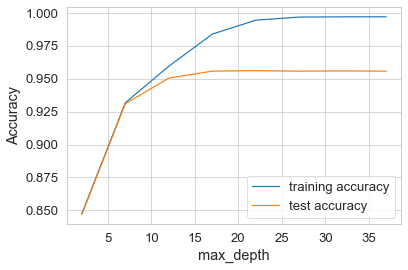

In [71]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.057823      0.060074         0.276007        0.010005   
1      29.117620      0.197144         1.343006        0.008362   
2      51.910078      0.741844         2.385586        0.027354   
3      73.097947      1.806600         3.300098        0.350708   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.901689   
1                500   {'n_estimators': 500}           0.907288   
2                900   {'n_estimators': 900}           0.903861   
3               1300  {'n_estimators': 1300}           0.903861   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.903185           0.902452           0.906217  ...   
1           0.906371           0.904624           0.910947  ...   
2           0.904923           0.904527           0.912154  ...   
3           0.904247           0.905686           0.910078  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.904232        0.002286                4            0.905592   
1         0.908344        0.002927                1            0.909803   
2         0.907215        0.003454                2            0.907221   
3         0.907051        0.003092                3            0.906605   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.905121            0.904641            0.904544   
1            0.909019            0.907886            0.907705   
2            0.907933            0.907585            0.908176   
3            0.907474            0.908574            0.907018   

   split4_train_score  mean_train_score  std_train_score  
0            0.903868          0.904753         0.000579  
1            0.907235          0.908330         0.000941  
2            0.905063          0.907195         0.001114  
3            0.906885          0.907311         0.000691  

[4 rows x 21 columns]

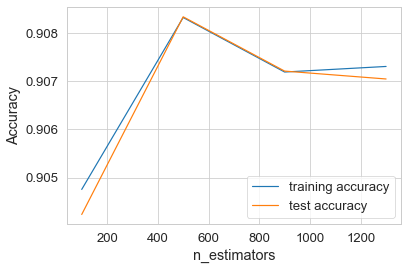

In [74]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [16,18,20,22],
    'n_estimators': [100,200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [76]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [16, 18, 20, 22], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [77]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9608375002413267 using {'max_depth': 22, 'n_estimators': 300}


## Final Model

In [78]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=22,
                             n_estimators=300)

In [79]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
# predict
predictions = rfc.predict(X_test)

In [81]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

   micro avg       0.96      0.96      0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [84]:
print(accuracy_score(y_test,predictions))

0.9626153786737728


- So a final accuracy of 96.2 %  is achieved.